<a href="https://colab.research.google.com/github/Rohit131313/Amazon-Mobile-Scraping-Analysis/blob/main/Amazon_Mobile_Dataset_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this Project , First we will be  Scraping the data from amazon website and convert it's whole data into the dataset and stored it in dataset and this is called as Web Scraping
### Then we will be using that csv file as the data for doing analysis

## As a Data Engineer we will be writting many ETL PIPELINES

### ETL stands for Extract, Transform, Load

### An ETL pipeline is the set of processes used to move data from a source or multiple sources into a database such as a data warehouse

### 1. Extract:

### - This phase involves gathering data from various sources. Sources can include databases, flat files, APIs, logs, or any other storage systems where data resides.

### - Extraction can be a complex process depending on the variety and structure of the data. It may involve pulling entire datasets or only specific subsets.

### - OR extracting data by doing data  Scraping from any website (Web Scraping) (which we will be doing in this project)

### 2.Transform:

### - Once the data is extracted, it often needs to be transformed into a format that is suitable for analysis or storage. This involves cleaning, aggregating, filtering, and restructuring the data.

### - Transformation may also involve handling missing or inconsistent data, converting data types, and creating derived fields to meet the requirements of the analysis.

### 3.Load:

### - After the data has been extracted and transformed, it is loaded into a target system, such as a data warehouse, database, or another storage solution.

### - Loading involves placing the transformed data into the appropriate tables or structures within the target system.

![Image of ETL](etl.png)


## Web Scraping:

Web scraping is the process of extracting information from websites. This is done by sending HTTP requests to the website, downloading the HTML content, and then parsing that content to extract the desired information. Web scraping is often used to collect data for various purposes such as data analysis, research, or content aggregation.
Here are the basic steps involved in web scraping:

### 1. Send a Request:

- Use an HTTP library (e.g., requests in Python) to send a request to the website's server.

- The server responds with the HTML content of the webpage.

### 2. Parse the HTML:

- Use an HTML parsing library (e.g., BeautifulSoup in Python) to parse the HTML content and navigate the structure of the page.

### 3.Extract Data:

- Identify the HTML elements that contain the data you want to scrape.

- Extract the relevant information using the parsing library.

### 4.Store or Use the Data:

- Once you've extracted the data, you can store it in a database, a file, or use it for analysis.

In [ ]:
!pip install bs4

### Beautiful Soup(bs4)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It provides Pythonic idioms for iterating, searching, and modifying the parse tree. It sits on top of popular Python parsers like lxml and html5lib, allowing you to try out different parsing strategies or trade speed for flexibility.

In [ ]:
!pip install requests

### Request Library

The requests library is commonly used in ETL (Extract, Transform, Load) processes when dealing with data from web-based sources.
As we will be sending request to amazon website (in this project) or any other website from which we want data from our local device

When extracting data from web APIs or web pages, the requests library is often used to make HTTP requests and retrieve data. APIs usually respond with data in a structured format like JSON, which can be easily parsed for further processing.



In [ ]:
!pip install pandas

We will be using the pandas for converting the online data we scraped into the dataframe and store it in csv file.
And we can you all other features of pandas too which we already discuss in previous projects

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

### Suppose we want to extract the  "Laptop"  data from amazon website
#### For this search "Laptop" in seach bar and on clicking enter you will be getting the webpage for all laptop products
#### Now what we will do we simply extract the html of this webpage containg the data of "Laptop" and then parse it to get data

![Amazon webpage of Laptop](Amazon.png)


In [ ]:
URL="https://www.amazon.in/s?k=laptop&crid=21KNC6TDHLMIV&sprefix=lapto%2Caps%2C318&ref=nb_sb_noss_2" ## link found on top of same webpage of laptop in amazon
## link of webpage whose html file you want to extract so that extract all the data of that webpage later on

###  When you open a website, your browser sends an HTTPS request to the server, and this request contains various headers, including the "User-Agent" header, which identifies the client making the request. The server can use this information to customize the response based on the characteristics of the client.

#### 1. HTTPS Requests:

- HTTP (Hypertext Transfer Protocol) is the foundation of data communication on the web. When you access a website, your browser sends an HTTP request to the server hosting the website, and the server responds with the requested data.

#### 2.Headers:

- HTTP headers are metadata elements that provide additional information about the HTTP request or response. They are key-value pairs sent between the client (your browser) and the server.

- Headers are used for various purposes, such as specifying the content type, content length, caching instructions, and more. Both the request and response can have headers.

#### 3.User-Agent:

- The "User-Agent" is a specific header field in an HTTP request that identifies the client making the request. It provides information about the user agent, which is typically the web browser or application used to access the website.

- The "User-Agent" header helps servers to understand the capabilities and characteristics of the client. It allows websites to serve different content or styles based on the device or browser type.

### Q. We have to send the user agent of our device when doing https request to amazon website for that "Laptop" webpage why?

Certainly! When you use a web browser to visit a website, the browser automatically includes a "User-Agent" in the HTTP request it sends to the server. The User-Agent provides information about the browser and the device you're using.

However, when you're making HTTP requests programmatically, for example, in a Jupyter Notebook, you need to manually specify a User-Agent. This is important because:

#### 1. Identification:

- The User-Agent helps the server identify the client making the request. By providing a User-Agent, you're telling the server what type of client you are (e.g., a browser), just like a regular user.

#### 2. Access Permission:

- Some websites may have security measures or access controls based on the User-Agent. By sending a User-Agent, you increase the chances of being recognized as a legitimate user, making it more likely that the server will allow your request.

#### 3. Web Scraping Best Practice:

- In web scraping scenarios, including a User-Agent is considered good practice. It shows respect for the website's policies and helps you avoid potential blocks or restrictions on your requests.

In essence, by including a User-Agent in your HTTP requests, you're mimicking the behavior of a regular user, making your requests more likely to be accepted and allowing you to extract data from the server successfully.

### Q.Will user agent depend on our device ie, will have user agent different for mobile and laptop ?

Yes, the User-Agent typically includes information about the device and browser you are using to make an HTTP request.

### 1. Device Type:

- Whether the request is coming from a desktop computer, laptop, tablet, or mobile device.

### 2.Operating System:

- The specific operating system running on the device (e.g., Windows, macOS, iOS, Android).

### 3.Browser:

- The web browser being used (e.g., Chrome, Firefox, Safari, Internet Explorer) and its version.

### 4.Additional Details:

- Sometimes, additional details about the client, such as the rendering engine or specific features supported by the browser.

### So to find out your user-agent
- visit WhatIsMyBrowser.com
- Go to Detect My Settings
- Then go to What is my user-agent?
- Copy your user agent

In [ ]:
# Header for request , As we have to send the header too as we are making http request programmitally otherwise if we send the http request the browser send the header automatically as same as the case of user agent
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36','Accept-Language':'en-US, en;q=0.5'})

In [ ]:
# HTTP Request
webpage = requests.get(URL,headers=HEADERS)

In [ ]:
webpage ## if the response is 200 means request is done successfully

<Response [200]>

### Remeber in this project I am using the random user-agent not my own user-agent as on using my user-agent I am encounter with 503 error (How to see that we are getting error ? By this <Response [503]> )
### And also remeber while using your user agent or data which is sensitve then we avoid google collab for that for security reasons

In [ ]:
webpage.content # on requesting getting the whole html code (in byte format) for the "Laptop" webpage

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- 

In [ ]:
type(webpage.content) # but this whole datat is present in byte format

bytes

In [ ]:
# to convert this in correct html format from byte we will be usign Beautiful Soup

# Soup Object containiang all data
soup = BeautifulSoup(webpage.content,'html.parser')

In [ ]:
soup # now we get the desired html code file

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--

In [ ]:
# Now as we extract the html code file
# Now to extract all the product links present in "Laptop" webpage of amazon
# Then to on iterating the product links we can extract the product data of all products
# As the product links  of that webpage present inside the "a" tag of the html code file

In [ ]:
# Fetch links as List of Tag Objects
# to find all the a tag with these class in html code file
links = soup.find_all("a" , attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [ ]:
type(links)

bs4.element.ResultSet

In [ ]:
links # get the list of all the a tag present in html code file

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MTo1Mzc1NDgxMjExMjg0NjkzOjE3MDA5MDM3ODM6c3BfYXRmOjIwMTY4MzQ4MTU4Mjk4OjowOjo&amp;url=%2FAcer-Processor-Graphics-Windows-Z2-493%2Fdp%2FB0C3R5VWP3%2Fref%3Dsr_1_1_sspa%3Fcrid%3D21KNC6TDHLMIV%26keywords%3Dlaptop%26qid%3D1700903783%26sprefix%3Dlapto%252Caps%252C318%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Acer One 14 AMD Ryzen 3 3250U Processor (8GB RAM/512GB SSD/AMD Radeon Graphics/Windows 11 Home) Thin and Light Laptop Z2-493 with 35.56 cm (14.0") HD Display</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MTo1Mzc1NDgxMjExMjg0NjkzOjE3MDA5MDM3ODM6c3BfYXRmOjMwMDAxNjgxNDQ2NTMzMjo6MDo6&amp;url=%2FHP-SmartChoice-Graphics-eq2132au-eq2182au%2Fdp%2FB0B4N77Y34%2Fref%3Dsr_1_2_sspa%3Fcrid%3D21KNC6

### Now In this case we will be finding all the product links of "Laptop" Webpage and then using the product link we will be extracting the data of all other products so we use find method of bs4 object
### But there may be possible that we have to use different strategy in different website so always first make strategy that how you will be extracting whole data from use the html code of paricular webpage of website and from the list of method of bs4 select the method which can be used to implement your strategy of extracting whole data which you want from website

In [ ]:
links[0] # links is not the list it is bs4.element.ResultSet where ResultSet is n BeautifulSoup (often abbreviated as BS4), a ResultSet is a collection of Tag objects that are returned when you perform a search on a parsed HTML or XML document.
# but we can access its data in similar way as list

<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MTo1Mzc1NDgxMjExMjg0NjkzOjE3MDA5MDM3ODM6c3BfYXRmOjIwMTY4MzQ4MTU4Mjk4OjowOjo&amp;url=%2FAcer-Processor-Graphics-Windows-Z2-493%2Fdp%2FB0C3R5VWP3%2Fref%3Dsr_1_1_sspa%3Fcrid%3D21KNC6TDHLMIV%26keywords%3Dlaptop%26qid%3D1700903783%26sprefix%3Dlapto%252Caps%252C318%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Acer One 14 AMD Ryzen 3 3250U Processor (8GB RAM/512GB SSD/AMD Radeon Graphics/Windows 11 Home) Thin and Light Laptop Z2-493 with 35.56 cm (14.0") HD Display</span> </a>

In [ ]:
link=links[0].get('href')

In [ ]:
type(links[0])

bs4.element.Tag

In [ ]:
link

'/sspa/click?ie=UTF8&spc=MTo1Mzc1NDgxMjExMjg0NjkzOjE3MDA5MDM3ODM6c3BfYXRmOjIwMTY4MzQ4MTU4Mjk4OjowOjo&url=%2FAcer-Processor-Graphics-Windows-Z2-493%2Fdp%2FB0C3R5VWP3%2Fref%3Dsr_1_1_sspa%3Fcrid%3D21KNC6TDHLMIV%26keywords%3Dlaptop%26qid%3D1700903783%26sprefix%3Dlapto%252Caps%252C318%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

### Since getting output of find method as list so  can use the properties of list which we need
### Similar for other data stuctures we get from different methods of bs4

In [ ]:
product_link="https://amazon.in" + link

In [ ]:
product_link

'https://amazon.in/sspa/click?ie=UTF8&spc=MTo1Mzc1NDgxMjExMjg0NjkzOjE3MDA5MDM3ODM6c3BfYXRmOjIwMTY4MzQ4MTU4Mjk4OjowOjo&url=%2FAcer-Processor-Graphics-Windows-Z2-493%2Fdp%2FB0C3R5VWP3%2Fref%3Dsr_1_1_sspa%3Fcrid%3D21KNC6TDHLMIV%26keywords%3Dlaptop%26qid%3D1700903783%26sprefix%3Dlapto%252Caps%252C318%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

In [ ]:
## on opening that above link browser you can see the product

In [ ]:
# Now we will be doing the same thing as we done for "Laptop" webpage
# using this link we will be extracting the html page of this product and then extract the data of that product using the html code file

In [ ]:
# HTTP Request
new_webpage = requests.get(product_link,headers=HEADERS)

In [ ]:
new_webpage

<Response [200]>

In [ ]:
# Soup Object containiang all data
new_soup = BeautifulSoup(new_webpage.content,'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--
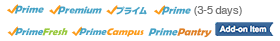
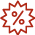

In [ ]:
new_soup

In [ ]:
# Now , Suppose want to extract the product title
# Then how you will get to know that product title is present in which tag of html and what it's class be
# Go to webpage => do inspect => here you see one arrow pointing diagonally upward click it => then on clicking any webpage
# ie, title or any other button the html code of that element get display in inspect window from where you can see the tag and class used in that element
# we can use class or id for specifying the element

![Inspect Page](Amazon2.png)


In [ ]:
# To Extract the Product Title
new_soup.find("span",attrs={"id":"productTitle"})

<span class="a-size-large product-title-word-break" id="productTitle">        Acer One 14 AMD Ryzen 3 3250U Processor (8GB RAM/512GB SSD/AMD Radeon Graphics/Windows 11 Home) Thin and Light Laptop Z2-493 with 35.56 cm (14.0") HD Display       </span>

In [ ]:
new_soup.find("span",attrs={"id":"productTitle"}).text

'        Acer One 14 AMD Ryzen 3 3250U Processor (8GB RAM/512GB SSD/AMD Radeon Graphics/Windows 11 Home) Thin and Light Laptop Z2-493 with 35.56 cm (14.0") HD Display       '

In [ ]:
new_soup.find("span",attrs={"id":"productTitle"}).text.strip() ## as this is string so can use property of string

'Acer One 14 AMD Ryzen 3 3250U Processor (8GB RAM/512GB SSD/AMD Radeon Graphics/Windows 11 Home) Thin and Light Laptop Z2-493 with 35.56 cm (14.0") HD Display'

In [ ]:
# to extract the price
new_soup.find("span",attrs={"class":"a-price-whole"})

<span class="a-price-whole">25,449<span class="a-price-decimal">.</span></span>

In [ ]:
new_soup.find("span",attrs={"class":"a-price-whole"}).text

'25,449.'

In [ ]:
# to extract the rating of this product
new_soup.find("span",attrs={"class":"a-icon-alt"})

<span class="a-icon-alt">3.8 out of 5 stars</span>

In [ ]:
new_soup.find("span",attrs={"class":"a-icon-alt"}).text

'3.8 out of 5 stars'

# Now we will be doing the extraction of whole data But in this case we will be using the data of mobile instead of Laptop

In [ ]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})

        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    # this is done so that we can't get error and our code stops
    # as it may be possible that some product will present there with different name of attribute -> id
    # then inside except we can give another class which can give the deal price
    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'class':'a-price-whole'}).text.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).text.strip()

        except:
            price = "00"

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-3-5 cm-cr-review-stars-spacing-big'}).string.strip()

    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).text.strip()

    except AttributeError:
        review_count = ""

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("span", attrs={'class':'a-size-medium a-color-success'}).text.strip()

        ##available = available.find("span").string.strip() to find tag inside other tag

    except AttributeError:
        available = "Not Available"

    return available

In [ ]:
    # add your user agent
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.in/s?k=mobile&crid=SD9BKP6RMRGL&sprefix=mobil%2Caps%2C371&ref=nb_sb_noss_2"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

    # Store the links as "links" is the bs4.element.ResultSet and ResultSet is n BeautifulSoup (often abbreviated as BS4), a ResultSet is a collection of Tag objects that are returned when you perform a search on a parsed HTML or XML document.
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    # we are storing the data in dictionary of list so that we can change it into the dataframe later
    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}

    # Loop for extracting product details from each link
    for link in links_list:

        # due to this getting error so simply deleting this product from parse html
        # see next cell
        if("https://aax-eu.amazon.in/x/c/RJBhupm6k0wjg62xNqq6rRoAAAGMBOLpxAMAAAH2AQBvbm9fdHhuX2JpZDEgICBvbm9fdHhuX2ltcDEgICD69lq2/https://www.amazon.in" in link):
            list.decompose()


        new_webpage = requests.get("https://www.amazon.in" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))


    # to change data stored in dictionary to dataframe
    amazon_df = pd.DataFrame.from_dict(d)

In [ ]:
# as the price column in not printing so to see the problem we can do the analysis by this
new_webpage = requests.get("https://www.amazon.in" + links_list[0], headers=HEADERS)
new_soup = BeautifulSoup(new_webpage.content, "html.parser")
new_soup.find("span", attrs={'class':'a-price-whole'}).text.strip()
# add .text.strip()

'32,999.'

In [ ]:
# as the avaibility column in not printing properly so to see the problem we can do the analysis by this
new_webpage = requests.get("https://www.amazon.in" + links_list[0], headers=HEADERS)
new_soup = BeautifulSoup(new_webpage.content, "html.parser")
new_soup.find("span", attrs={'class':'a-size-medium a-color-success'}).text.strip()
# add .text.strip()

'In stock'

## As whenever want to apply particular operation on any element
- simply see the type of that element or value means list,dictionary or any other by using type(element) and run it
- then find the inbuild method for that type to perform operation which you want to apply then simply apply that method

In [ ]:
amazon_df

title    price  \
0   iQOO Neo 7 Pro 5G (Dark Storm, 8GB RAM, 128GB ...  32,999.   
1   Samsung Galaxy M14 5G (ICY Silver,6GB,128GB)|5...  15,990.   
2   Samsung Galaxy M04 Light Green, 4GB RAM, 64GB ...   8,499.   
3   Xiaomi Redmi 10 Power (Power Black, 8GB RAM, 1...   9,899.   
4   realme narzo 60X 5G（Nebula Purple 6GB,128GB St...  14,499.   
5   realme narzo N53 (Feather Black, 8GB+128GB) 33...  11,999.   
6   realme narzo N55 (Prime Blue, 6GB+128GB) 33W S...  10,999.   
7         Redmi A2 (Sea Green, 2GB RAM, 64GB Storage)   5,299.   
8   realme narzo 60X 5G（Nebula Purple 4GB, 128GB S...  12,999.   
9      Redmi 12 5G Moonstone Silver 8GB RAM 256GB ROM  14,999.   
10  iQOO Neo 7 5G (Frost Blue, 8GB RAM, 128GB Stor...  25,999.   
11  Redmi 12C (Matte Black, 4GB RAM, 64GB Storage)...   6,799.   
12  realme narzo N55 (Prime Black, 6GB+128GB) 33W ...  10,999.   
13  realme narzo 60X 5G（Stellar Green, 4GB, 128GB ...  12,999.   
14  realme narzo 50i Prime (Mint Green 4GB RAM+64G...   7,299.   
15  IKALL K510 Smartphone (5" Display, 2GB, 32GB, ...   4,999.   
16  iQOO Z6 Lite 5G (Mystic Night, 6GB RAM, 128GB ...  12,999.   
17  Motorola E13 (Aurora Green, 8GB RAM, 128GB Sto...   8,990.   
18  Nokia G42 5G | Snapdragon® 480+ 5G | 50MP Trip...  12,599.   
19  iQOO Z6 Lite 5G (Stellar Green, 6GB RAM, 128GB...  12,999.   
20  Redmi Note 12 (Sunrise Gold, 6GB RAM, 64GB Sto...  11,999.   
21  Oppo A79 5G (Glowing Green, 8GB RAM, 128GB Sto...  19,999.   

                rating         reviews availability  
0   4.3 out of 5 stars   1,095 ratings     In stock  
1   4.0 out of 5 stars  12,391 ratings     In stock  
2   3.9 out of 5 stars  14,699 ratings     In stock  
3   4.1 out of 5 stars   3,977 ratings     In stock  
4   4.1 out of 5 stars   3,244 ratings     In stock  
5   3.9 out of 5 stars   9,880 ratings     In stock  
6   4.0 out of 5 stars   9,417 ratings     In stock  
7   3.9 out of 5 stars   5,314 ratings     In stock  
8   4.1 out of 5 stars   3,244 ratings     In stock  
9   3.9 out of 5 stars   6,395 ratings     In stock  
10  4.2 out of 5 stars   5,512 ratings     In stock  
11  4.0 out of 5 stars  10,458 ratings     In stock  
12  4.0 out of 5 stars   9,417 ratings     In stock  
13  4.1 out of 5 stars   3,244 ratings     In stock  
14  4.0 out of 5 stars   7,716 ratings     In stock  
15       Previous page                     In stock  
16  4.1 out of 5 stars  18,175 ratings     In stock  
17  3.9 out of 5 stars     123 ratings               
18  3.7 out of 5 stars     489 ratings     In stock  
19  4.1 out of 5 stars  18,175 ratings     In stock  
20  3.9 out of 5 stars     312 ratings     In stock  
21  3.8 out of 5 stars      20 ratings     In stock

In [ ]:
amazon_df['price']

0     32,999.
1     15,990.
2      8,499.
3      9,899.
4     14,499.
5     11,999.
6     10,999.
7      5,299.
8     12,999.
9     14,999.
10    25,999.
11     6,799.
12    10,999.
13    12,999.
14     7,299.
15     4,999.
16    12,999.
17     8,990.
18    12,599.
19    12,999.
20    11,999.
21    19,999.
Name: price, dtype: object

In [ ]:
# to save the data in csv file
amazon_df.to_csv("amazon_data.csv", header=True, index=False)